In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
sb.set()

df = pd.read_csv("data/processed_data.csv")

# Generating Balanced Dataset with Over-sampling

1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64



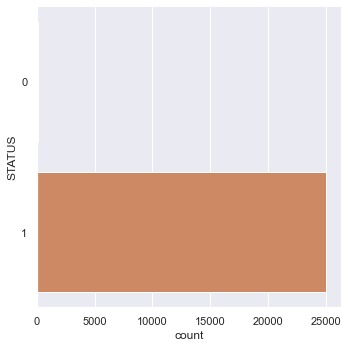

In [33]:
# Function for calculating ratio of majority and minority class
def ratio(df):
    print(df['STATUS'].value_counts())
    print(df['STATUS'].value_counts(normalize=True))
    sb.catplot(y = "STATUS", data = df, kind = "count")
    print()
 
# Function to calculating metrics of confusionMatrix
def confusionMatrix(matrix, flag):
    #TN FP
    #FN TP
    
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    if flag:
        print("Test Dataset: ")
    else:
        print("Train Dataset: ")
    
    print("True Positive Rate: {:.2f}%".format((TP * 100)/(TP + FN)))
    print("False Positive Rate: {:.2f}%\n".format((FP * 100)/(FP + TN)))
    
    print("True Negative Rate: {:.2f}%".format((TN * 100)/(TN + FP)))
    print("False Negative Rate: {:.2f}%\n".format((FN * 100)/(FN + TP)))
    print()

ratio(df)

In [34]:
non_int = ["ID", "TOTAL_GOOD_DEBT", "TOTAL_BAD_DEBT"]
for col in df:
    if df[col].dtypes == "object":
        non_int.append(col)
new_df = df.drop(columns=non_int)

In [35]:
# Considering numeric vars only
# Over-sampling (using SMOTE - Synthetic Minority Over-sampling TEchnique)

# Dictionary to store top 5 variables - {score : var_name}
top = {}

y = pd.DataFrame(new_df["STATUS"])
for col in new_df:
    if col != 'STATUS' and col != 'GOOD_PERCENT':
        X = pd.DataFrame(new_df[col])
        
        # Resampling the minority class. The strategy can be changed as required.
        sm = SMOTE(sampling_strategy='minority', random_state=42)

        # Fit and resample imbalanced data
        X_res, y_res = sm.fit_resample(X, y) # kmeans_smote.fit_resample(X, y)
        print(col)

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25)

        # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 8)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        score = dectree.score(X_train, y_train)
        print(f'Accuracy  :\t{score}')
        print()
        confusionMatrix(confusion_matrix(y_train, y_train_pred), 0)
        if len(top) < 3:
            top[score] = col
        elif score > min(top.keys()):
            top.pop(min(top.keys()))
            top[score] = col

print()
print('BEST VARIABLES:')
for key, val in top.items():
    print(f'{val}      \t: {key}')

FLAG_OWN_CAR
Train Data for FLAG_OWN_CAR
Accuracy  :	0.5028212498669222

Train Dataset: 
True Positive Rate: 0.00%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 100.00%


FLAG_OWN_REALTY
Train Data for FLAG_OWN_REALTY
Accuracy  :	0.5149313318428617

Train Dataset: 
True Positive Rate: 65.47%
False Positive Rate: 62.56%

True Negative Rate: 37.44%
False Negative Rate: 34.53%


CNT_CHILDREN
Train Data for CNT_CHILDREN
Accuracy  :	0.5394974981369105

Train Dataset: 
True Positive Rate: 12.43%
False Positive Rate: 4.63%

True Negative Rate: 95.37%
False Negative Rate: 87.57%


AMT_INCOME_TOTAL
Train Data for AMT_INCOME_TOTAL
Accuracy  :	0.7033429149366549

Train Dataset: 
True Positive Rate: 70.03%
False Positive Rate: 29.37%

True Negative Rate: 70.63%
False Negative Rate: 29.97%


FLAG_MOBIL
Train Data for FLAG_MOBIL
Accuracy  :	0.5005056957308635

Train Dataset: 
True Positive Rate: 100.00%
False Positive Rate: 100.00%

True Negative Rate: 0.00%
False Nega

# Prediction Using Balanced Dataset

Before Over-sampling: 
1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64

       AMT_INCOME_TOTAL  APPLICANT_AGE  YEARS_WORKING
count      2.513400e+04   25134.000000   25134.000000
mean       1.948339e+05      40.536166       7.204106
std        1.045110e+05       9.559474       6.414231
min        2.700000e+04      21.000000       0.000000
25%        1.350000e+05      33.000000       3.000000
50%        1.800000e+05      40.000000       5.000000
75%        2.250000e+05      48.000000      10.000000
max        1.575000e+06      67.000000      43.000000

After Over-sampling: 
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8487171297774939
Train Dataset: 
True Positive Rate: 80.02%
False Positive Rate: 10.24%

True Negative Rate: 89.76%
False Negative Rate: 19.98%



Goodness of Fit of Model 	Test Dataset
Classific

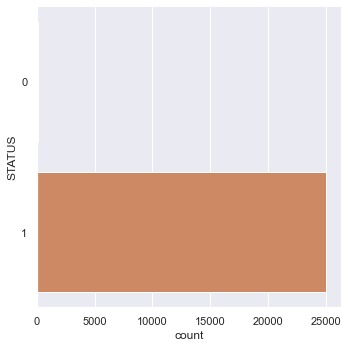

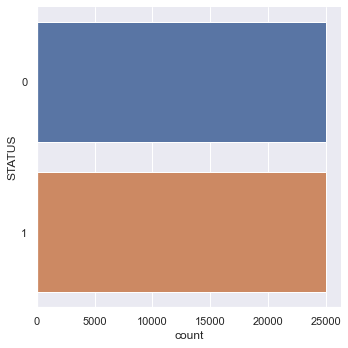

In [36]:
'''Over-sampling'''

y1 = pd.DataFrame(new_df['STATUS'])
print('Before Over-sampling: ')
ratio(y1)

best = top.values()
for col in new_df:
    if col not in best:
        new_df.drop(columns=col, inplace=True)
x1 = pd.DataFrame(new_df)
print(x1.describe())
print()

X_temp, y_temp = sm.fit_resample(x1, y1)
print('After Over-sampling: ')
ratio(y_temp)


'''Prediction'''

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.25)

dectree = DecisionTreeClassifier(max_depth = 8) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
confusionMatrix(confusion_matrix(y_train1, y_train_pred1), 0)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
confusionMatrix(confusion_matrix(y_test1, y_test_pred1), 1)
print()


<AxesSubplot:>

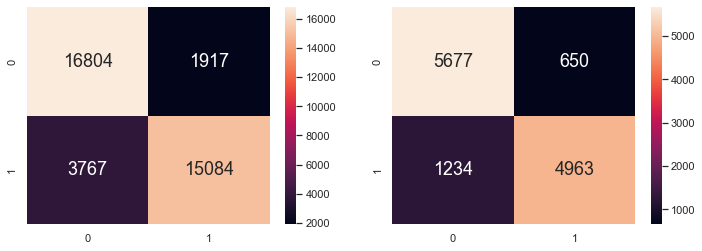

In [37]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [38]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(64,12), dpi = 600)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])

[Text(0.41323529411764703, 0.9444444444444444, 'YEARS_WORKING <= 5.0\ngini = 0.5\nsamples = 37572\nvalue = [18721, 18851]\nclass = Good'),
 Text(0.2411764705882353, 0.8333333333333334, 'YEARS_WORKING <= 4.0\ngini = 0.476\nsamples = 20612\nvalue = [12551, 8061]\nclass = Bad'),
 Text(0.22941176470588234, 0.7222222222222222, 'YEARS_WORKING <= 4.0\ngini = 0.488\nsamples = 19121\nvalue = [11060, 8061]\nclass = Bad'),
 Text(0.13529411764705881, 0.6111111111111112, 'YEARS_WORKING <= 3.001\ngini = 0.466\nsamples = 16862\nvalue = [10621, 6241]\nclass = Bad'),
 Text(0.12352941176470589, 0.5, 'YEARS_WORKING <= 3.0\ngini = 0.485\nsamples = 15082\nvalue = [8841, 6241]\nclass = Bad'),
 Text(0.058823529411764705, 0.3888888888888889, 'YEARS_WORKING <= 2.0\ngini = 0.447\nsamples = 12909\nvalue = [8557, 4352]\nclass = Bad'),
 Text(0.047058823529411764, 0.2777777777777778, 'AMT_INCOME_TOTAL <= 427675.562\ngini = 0.486\nsamples = 10464\nvalue = [6112, 4352]\nclass = Bad'),
 Text(0.023529411764705882, 0.16

# RandomForest Classification

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
randomForest = RandomForestClassifier(n_estimators = 100, max_depth = 8, random_state=0) 

# Fit Random Forest on Train Data
randomForest.fit(X_train1, y_train1) 

C:\Users\iwcm3\AppData\Local\Temp/ipykernel_2380/2609625007.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=8, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8942297455552006

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8905301820504631



<AxesSubplot:>

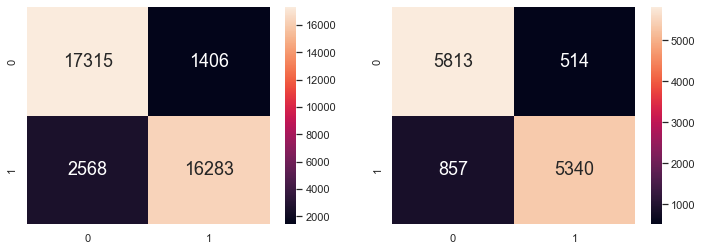

In [40]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = randomForest.predict(X_train1)
y_test_pred = randomForest.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randomForest.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randomForest.score(X_test1, y_test1))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [41]:
confusionMatrix(confusion_matrix(y_train1, y_train_pred), 0)
print()
confusionMatrix(confusion_matrix(y_test1, y_test_pred), 1)

Train Dataset: 
True Positive Rate: 86.38%
False Positive Rate: 7.51%

True Negative Rate: 92.49%
False Negative Rate: 13.62%



Test Dataset: 
True Positive Rate: 86.17%
False Positive Rate: 8.12%

True Negative Rate: 91.88%
False Negative Rate: 13.83%




# Finding Optimal Threshold

In [42]:
predictedProbability = randomForest.predict_proba(X_test1)
print(predictedProbability.shape)
predictedProbability

(12524, 2)


array([[0.34075766, 0.65924234],
       [0.74889911, 0.25110089],
       [0.80923134, 0.19076866],
       ...,
       [0.51788622, 0.48211378],
       [0.16177685, 0.83822315],
       [0.60070314, 0.39929686]])

Threshold 0.20 ---- 0.6354313470277901
Threshold 0.21 ---- 0.6426161177271646
Threshold 0.22 ---- 0.647354385801682
Threshold 0.23 ---- 0.6554117624584659
Threshold 0.24 ---- 0.6688462495771634
Threshold 0.25 ---- 0.6747665979594841
Threshold 0.26 ---- 0.6927039317754689
Threshold 0.27 ---- 0.7151325076382192
Threshold 0.28 ---- 0.7281685471684027
Threshold 0.29 ---- 0.7499682274870608
Threshold 0.30 ---- 0.75596594445698
Threshold 0.31 ---- 0.7577603422367019
Threshold 0.32 ---- 0.7674573794980104
Threshold 0.33 ---- 0.7716391471943819
Threshold 0.34 ---- 0.7850686608914275
Threshold 0.35 ---- 0.7933332762027462
Threshold 0.36 ---- 0.7985998619327139
Threshold 0.37 ---- 0.8016636554511417
Threshold 0.38 ---- 0.8092269800524219
Threshold 0.39 ---- 0.8141824336247784
Threshold 0.40 ---- 0.8267310523283277
Threshold 0.41 ---- 0.8359406687630021
Threshold 0.42 ---- 0.844608705084487
Threshold 0.43 ---- 0.8600989879239966
Threshold 0.44 ---- 0.8715031075341242
Threshold 0.45 ---- 0.8760838

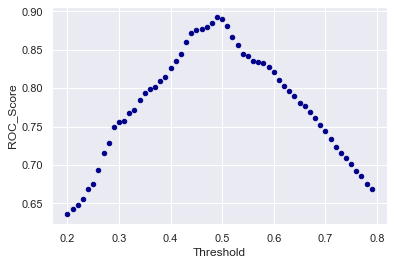

In [43]:
step = 0.01 
thresholdValue = 0.2 
rocScore = 0
graph = []

while thresholdValue <=0.8: #continue to check best threshold upto probability 0.8
    tempValue = thresholdValue
    predicted = (predictedProbability[:,1] >= tempValue).astype('int') #change the class boundary for prediction
    print('Threshold', f"{round(tempValue, 2):<04}", '----', roc_auc_score(y_test1, predicted))
    graph.append([tempValue, roc_auc_score(y_test1, predicted)])
    if rocScore < roc_auc_score(y_test1, predicted): #store the threshold for best classification
        rocScore = roc_auc_score(y_test1, predicted)
        thrsh_score = float(thresholdValue)
    thresholdValue += step
df = pd.DataFrame(graph, columns = ['Threshold', 'ROC_Score'])
df.plot.scatter(x='Threshold', y='ROC_Score', c='DarkBlue')
print('--- Optimum Threshold ---',f"{round(thrsh_score, 2):<04}",'--ROC--',rocScore)


# Applying Threshold to Prediction

In [44]:
actual_status = y_test1.values
threshold = thrsh_score

TP = TN = FP = FN = 0

for i in range(len(predictedProbability)):
    if predictedProbability[i][1] > threshold and actual_status[i][0]:
        TP += 1
    elif predictedProbability[i][1] < threshold and not actual_status[i][0]:
        TN += 1
    elif predictedProbability[i][1] > threshold and not actual_status[i][0]:
        FP += 1
    elif predictedProbability[i][1] < threshold and actual_status[i][0]:
        FN += 1

print(TP, TN, FP, FN)
print('total values:', TP + TN + FP + FN)
print('Accuracy:', (TP + TN) / 12524)
print('FPR:', FP / (FP + TN))
print('TPR:', TP / (FN + TP))
print('TNR:', TN / (FP + TN))
print('FNR:', FN / (FN + TP))

5488 5698 629 709
total values: 12524
Accuracy: 0.8931651229639093
FPR: 0.09941520467836257
TPR: 0.885589801516863
TNR: 0.9005847953216374
FNR: 0.11441019848313701
